In [1]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Synthetic data
X = np.random.rand(100, 1) * 10
y = 3 * X + 5 + np.random.randn(100, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.8192553343101273


In [2]:
# Multiple feature dataset
X = np.random.rand(100, 3)
y = 2*X[:,0] + 4*X[:,1] - 3*X[:,2] + 10 + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)


MSE: 1.3931652258896434


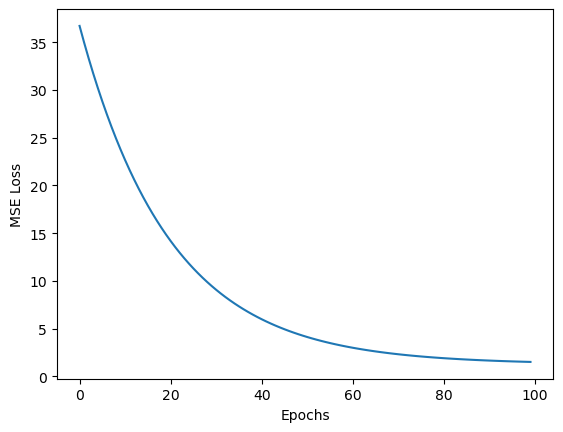

In [3]:
import matplotlib.pyplot as plt

X = np.c_[np.ones(100), np.random.rand(100)]
y = 4*X[:,1] + 2 + np.random.randn(100)

theta = np.random.randn(2)
alpha = 0.01
epochs = 100
losses = []

for _ in range(epochs):
    y_pred = X.dot(theta)
    error = y_pred - y
    loss = np.mean(error**2)
    losses.append(loss)

    grad = 2/len(X) * X.T.dot(error)
    theta -= alpha * grad

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge

data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

models = [lr, lasso, ridge]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__,
          mean_squared_error(y_test, y_pred))


LinearRegression 2821.7509810013103
Lasso 2775.165076183444
Ridge 3112.9664151980805


In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load dataset
boston = fetch_openml(name='boston', version=1)

# FIX: convert to numeric
X = boston.data.to_numpy(dtype=float)
y = boston.target.to_numpy(dtype=float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0)
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        model.__class__.__name__,
        "MSE =", mean_squared_error(y_test, y_pred)
    )


LinearRegression MSE = 21.51744423117726
Lasso MSE = 22.96383361575593
Ridge MSE = 22.044053089860967
